# Ejercicio 4.3.

In [1]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

### Características del recinto

In [2]:
#Dimensiones
d=13
h0=4
h1=7
w0=6
w1=16

In [3]:
#Superficies:
sx1=w0*h0 #pared 1
sx2=w1*h1 #pared 2
sz3=((w1+w0)/2)*np.sqrt(d**2-(((w1-w0)**2)/4)) #piso
sz4=((w1+w0)/2)*np.sqrt((d**2+(h1-h0)**2)-(((w1-w0)**2)/4)) #techo
sy5=((d*(h1-h0))/2)+h0*d #paredes laterales
sy6=((d*(h1-h0))/2)+h0*d

#Superficie total
stot=sx1+sx2+sz3+sz4+sy5+sy6
print(sx1,sx2,sz3,np.round(sz4,1),sy5,sy6)
print(np.round(stot,1))

24 112 132.0 136.1 71.5 71.5
547.1


In [4]:
#Volumen
V1=(np.sqrt(d**2-(((w1-w0)**2)/4))*(h1-h0)*w0)/2
V2=(np.sqrt(d**2-(((w1-w0)**2)/4))*(h1-h0)*(w1-w0)*2)/6
V3=np.sqrt(d**2-(((w1-w0)**2)/4))*((h0*(w1+w0))/2)
V=V1+V2+V3
print(V)

756.0


In [5]:
#Frecuencias
frec=(125,250,500,1000,2000,4000)

### Coeficientes de Absorción según frecuencia

In [6]:
#Concreto/hormigón en techo y paredes
a125=0.01
a250=0.02
a500=0.03
a1000=0.04
a2000=0.05
a4000=0.07
arrayAbs=[a125,a250,a500,a1000,a2000,a4000]
print(abs)

<built-in function abs>


In [7]:
#madera en concreto y lana de vidrio paredes laterales
ma125=0.17
ma250=0.55
ma500=0.8
ma1000=0.9
ma2000=0.85
ma4000=0.8
arrayAbs_ml=[ma125,ma250,ma500,ma1000,ma2000,ma4000]
print(abs)

<built-in function abs>


### Modelo Eyring

In [8]:
#Eyring

#Para crear arreglo
arrayEyring=[]

#Cálculo T60
for i in (arrayAbs): 
    for h in (arrayAbs_ml):    
        T60=(-0.161*V)/(stot*(np.log(1-((sx1*i)+(sx2*i)+(sz3*i)+(sz4*i)+(sy5*h)+(sy6*h))/stot)))
    
    arrayEyring.append(T60)

print(arrayEyring)    

[0.9118898307710439, 0.8778127132208512, 0.8458993675127265, 0.8159487206243801, 0.7877838390731862, 0.7362038269266915]


Text(0.5, 1.0, 'T60 Eyring')

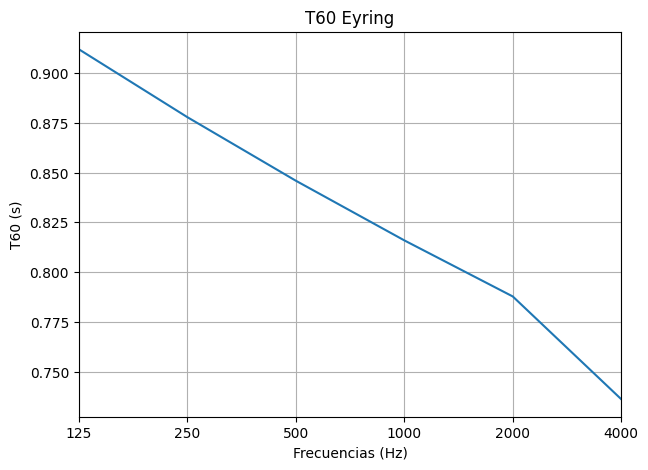

In [9]:
#Gráfica T60 Eyring
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.plot(frec, arrayEyring)
ax.set_xlabel('Frecuencias (Hz)')
ax.set_xscale('log') # escala logaritmica eje x
ax.set_xticks(frec) # valores escala eje x
ax.set_xticklabels([str(f) for f in frec]) # etiqueta para valores eje x
ax.minorticks_off() # elimina valores sin etiqueta
ax.grid() #grilla
ax.set_ylabel('T60 (s)')
ax.set_xlim([frec[0],frec[-1]]) # limites de eje x
ax.set_title('T60 Eyring')

In [11]:
RT_mid= (arrayEyring[2] + arrayEyring[3])/2
print(RT_mid)

0.8309240440685532
